<a href="https://colab.research.google.com/github/Ayushraj6202/Churn-Prediction/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [117]:
data=pd.read_csv("/content/drive/MyDrive/DL/1/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# columns which are irrelevant for prediction
`RowNumber` `CustomerId` i will drop these columns from my data

In [118]:
drop_clmn=["RowNumber","CustomerId","Surname"]
data.drop(columns=drop_clmn,inplace=True)

In [119]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


No null values and most of data type is int and float

lets check for categorical values

In [121]:
data["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [122]:
data["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

*  `drop_first =True` to remove multicollinearity

In [123]:
data=pd.get_dummies(data,columns=["Gender","Geography"],drop_first=True)

In [124]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True


Split data into X & y

In [125]:
X=data.drop(columns=["Exited"])
y=data["Exited"]

In [126]:
print(X.shape)
print(y.shape)

(10000, 11)
(10000,)


In [127]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [128]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

Model

In [129]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [130]:
model=Sequential()
model.add(Dense(8,activation="relu",input_dim=X.shape[1]))
model.add(Dense(4,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))

In [131]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 96        
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [132]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [133]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 3s 4ms/step - loss: 0.7305 - accuracy: 0.4563 - val_loss: 0.6097 - val_accuracy: 0.7831
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5490 - accuracy: 0.7947 - val_loss: 0.5073 - val_accuracy: 0.7969
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4866 - accuracy: 0.7958 - val_loss: 0.4742 - val_accuracy: 0.7969
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4619 - accuracy: 0.7959 - val_loss: 0.4568 - val_accuracy: 0.7969
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4462 - accuracy: 0.8003 - val_loss: 0.4452 - val_accuracy: 0.8037
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4362 - accuracy: 0.8109 - val_loss: 0.4379 - val_accuracy: 0.8112
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4296 - accuracy: 0.8163 - val_loss: 0.4333 - val_accuracy: 0.8175

weights and bias

In [134]:
model.layers[2].get_weights()

[array([[-1.8781903],
        [-2.4124978],
        [ 2.7418044],
        [ 2.4900696]], dtype=float32),
 array([-0.33383253], dtype=float32)]

In [135]:
y_pred=model.predict(X_train)

250/250 [==============================] - 1s 2ms/step


In [136]:
y_pred

array([[0.03677839],
       [0.6046622 ],
       [0.12628713],
       ...,
       [0.03734306],
       [0.02602225],
       [0.7945557 ]], dtype=float32)

In [137]:
new_y = [1 if pred > 0.5 else 0 for pred in y_pred]
# new_y=np.where(y_pred>0.5 , 1, 0)

Training set accuracy

In [138]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,new_y)

0.865375

Test set accuracy

In [139]:
y_pred_test=model.predict(X_test)
new_y_test= np.where(y_pred_test>0.5,1,0)

63/63 [==============================] - 0s 2ms/step


In [140]:
accuracy_score(y_test,new_y_test)

0.8595

Plots

In [141]:
loss=history.history['loss']
accuracy=history.history['accuracy']

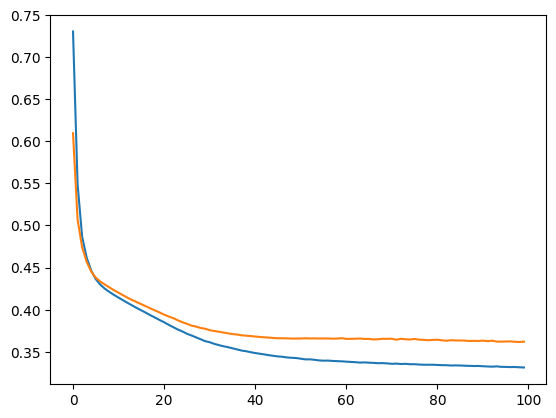

In [142]:
plt.plot(loss)
plt.plot(history.history['val_loss'])

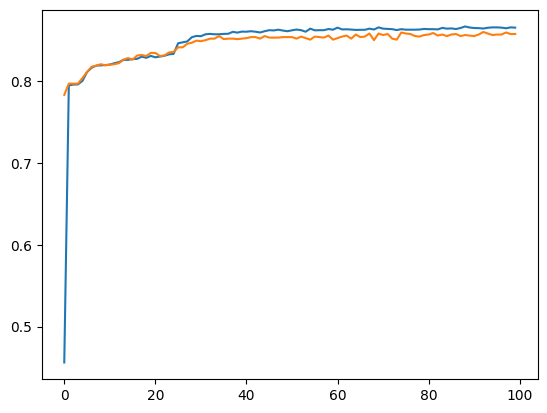

In [143]:
plt.plot(accuracy)
plt.plot(history.history['val_accuracy'])